<a href="https://colab.research.google.com/github/LeisureChang/Soil-Texture-Predict/blob/main/%E9%9A%8F%E6%9C%BA%E6%A3%AE%E6%9E%97%E5%88%86%E7%B1%BB%E9%A2%84%E6%B5%8B%E5%9C%9F%E5%A3%A4%E8%B4%A8%E5%9C%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  cohen_kappa_score
from sklearn.model_selection import GridSearchCV

In [13]:
data = pd.read_excel('/content/10.建模数据_四分类.xls')
data

,SoilTexture4,Lon,Lat,VRM,ValDep,TWI,TCI_Low,SPI,Slope_Heig,MRVBF,MRRTF,Flow_Width,Flow_PathL,Flow_Acc,EVI0306,CR1221,CR1127,CR1103,CR0102,Mv
0,2,109.828425,19.441848,0.000124,134.477005,10.39210,0.906142,0.011635,4.85197,1.003640,0.077264,26.131201,3366.060059,4.210790e+06,1.000000,1.45358,1.85427,1.79126,1.85921,3
1,1,109.815820,19.434409,0.000149,135.559998,3.53718,0.794531,2.377630,4.82668,0.895503,0.061830,25.687700,114.722000,2.593100e+03,1.000000,1.33038,1.66227,1.76087,2.86169,3.3
2,1,109.885657,19.512579,0.000720,41.636200,1.86444,0.734556,1.535210,7.49509,0.742679,2.964070,20.000000,36.679401,6.140830e+02,1.000000,1.31839,2.34724,1.62607,1.82255,5.4
3,2,109.794994,19.531786,0.000467,88.710403,3.04947,0.809306,18.432899,3.16276,0.251870,0.231734,28.039499,313.585999,3.644010e+03,1.000000,2.65485,2.51734,2.29003,1.71438,6.5
4,1,109.865442,19.520554,0.000920,87.152901,10.22660,0.866208,0.000935,4.38901,1.242470,1.328500,26.131201,1930.119995,2.551250e+06,1.000000,1.50029,1.41746,1.48598,2.87528,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,1,110.136980,19.944642,0.000249,76.987503,3.40534,0.772646,0.498536,3.36161,2.851670,1.439130,28.273399,0.000000,4.000000e+02,0.433036,2.04259,1.74395,1.93669,1.72299,6.5
1402,1,110.146816,19.949323,0.000149,87.684402,10.85190,0.842015,106.063004,2.22925,3.929200,0.050578,26.131300,827.036987,1.246460e+05,1.000000,1.95820,1.60945,1.92053,1.66950,4.9
1403,1,110.138080,19.950001,0.000497,82.695900,4.37100,0.776038,4.857780,2.60144,3.856980,1.958020,24.898800,20.000000,4.611630e+02,0.592949,2.10254,1.70177,1.69798,1.70523,7.52
1404,1,110.144255,19.957102,0.000347,72.910896,6.18748,0.791074,16.571699,6.33447,1.372950,0.023130,27.669500,412.362000,7.252780e+03,1.000000,1.83111,2.02830,1.44892,1.83956,11.7


In [14]:
# 模型总体评估指标
X = data.iloc[:,3:]
Y = data.iloc[:,0]
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X, Y,test_size=0.3,random_state=999)

In [15]:
# 用SMOTE算法重采样数据集
'''
SMOTE（Synthetic Minority Oversampling Technique），合成少数类过采样技术.
基本思想是对少数类样本进行分析并根据少数类样本人工合成新样本添加到数据集中.
'''
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
Xtrain_oversample, Ytrain_oversample = oversample.fit_resample(Xtrain, Ytrain)

In [23]:
# 调参之前精度
model = RandomForestClassifier(random_state=999)

model = model.fit(Xtrain_oversample,Ytrain_oversample) #使用过采样后的训练集进行训练

predict_Y = model.predict(Xtest) # 使用测试集进行预测（注意测试集是没有经过SMOTE平衡之前的测试集）

# 总体预测准确度
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(Ytest, predict_Y)
print('Overall_Accuracy:  ',accuracy_score)
'''
加权平均（weighted）：对每个类别的评估指标进行加权平均，权重是每个类别的样本数量占总样本数量的比例。适用于类别不平衡的情况
'''
# 总体精确度
from sklearn.metrics import precision_score
precision_weighted = precision_score(Ytest, predict_Y,average='weighted')
print('Precision',precision_weighted)

# 总体召回率
from sklearn.metrics import recall_score
recall_score = recall_score(Ytest, predict_Y,average='weighted')
print("Recall     ",recall_score)

# 总F1分数
from sklearn.metrics import f1_score
f1_score = f1_score(Ytest, predict_Y,average='weighted')
print("F1-score   ",f1_score)

# 计算Kappa系数
kappa = cohen_kappa_score(Ytest, predict_Y)
print("Kappa Coefficient", kappa)

Overall_Accuracy:   0.6303317535545023
Precision 0.643994764340612
Recall      0.6303317535545023
F1-score    0.6354270044622548
Kappa Coefficient 0.35873133383337064


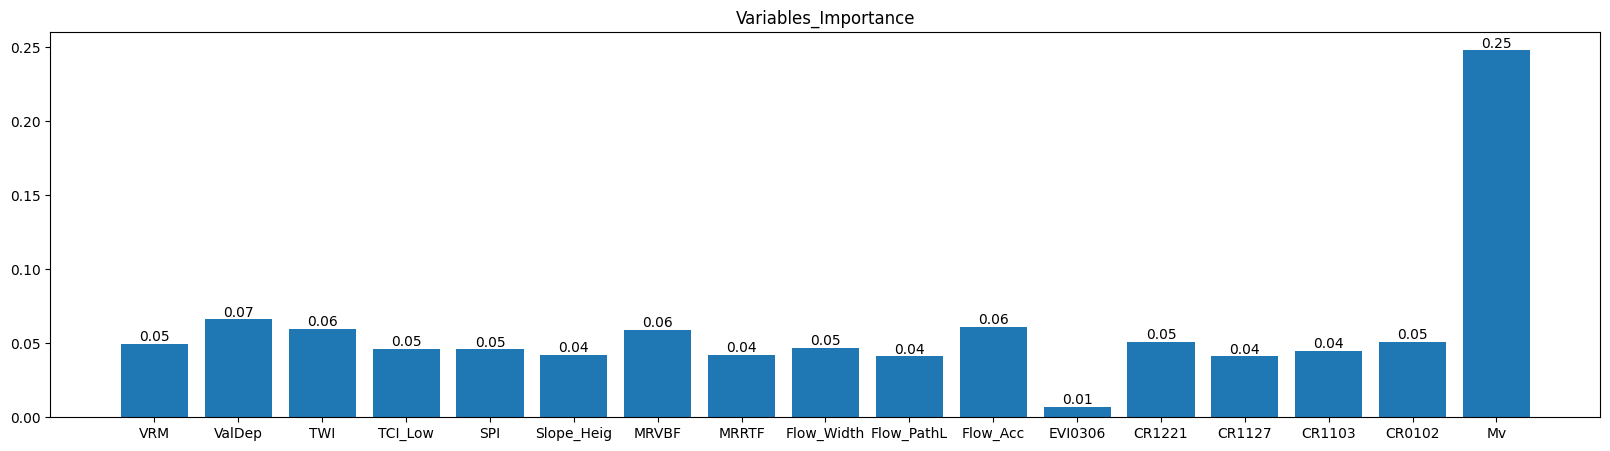

In [37]:
# 变量重要性可视化
feature_importances = model.feature_importances_
names = model.feature_names_in_
plt.figure(figsize = (18, 5))
bars = plt.bar(names, feature_importances)

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.title("Variables_Importance")

plt.show()

使用网格搜索调整所有参数，得出最佳参数组合

In [ ]:
# 网格搜索
param_grid = {
                        'n_estimators' : np.arange(400,500,10),
                        'max_depth' : np.arange(1,30,1),
                        'min_samples_leaf' : ,
                        'min_samples_split' : ,
                        'max_features' :,
                        'oob_score' : ,
                        entropy =  ['gini', 'entropy']
             }
model_smote = RandomForestClassifier(n_jobs=-1, random_state=999)
GS = GridSearchCV(model_smote, param_grid, cv = 5, scoring='f1_weighted')
GS.fit(Xtrain_oversample,Ytrain_oversample)
print(GS.best_params_)
print(GS.best_score_)

0.8542893234332677 381


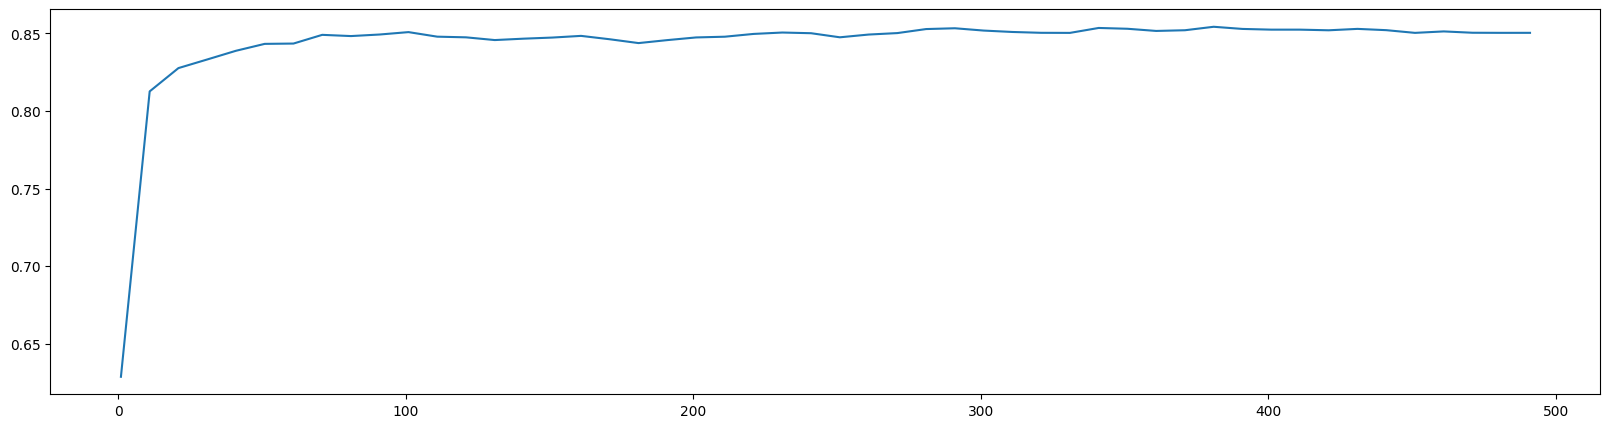

In [24]:
score1 = []
for i in range(0,500,10):
  model_smote = RandomForestClassifier(n_estimators=i+1,
                                     n_jobs=-1,
                                     random_state=999)
  # model_smote = model_smote.fit(Xtrain_oversample, Ytrain_oversample)
  score = cross_val_score(model_smote,Xtrain_oversample, Ytrain_oversample,cv=5,scoring='f1_weighted').mean()
  score1.append(score)
print(max(score1),(score1.index(max(score1))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,501,10),score1)
plt.show()

0.8548126092976757 382


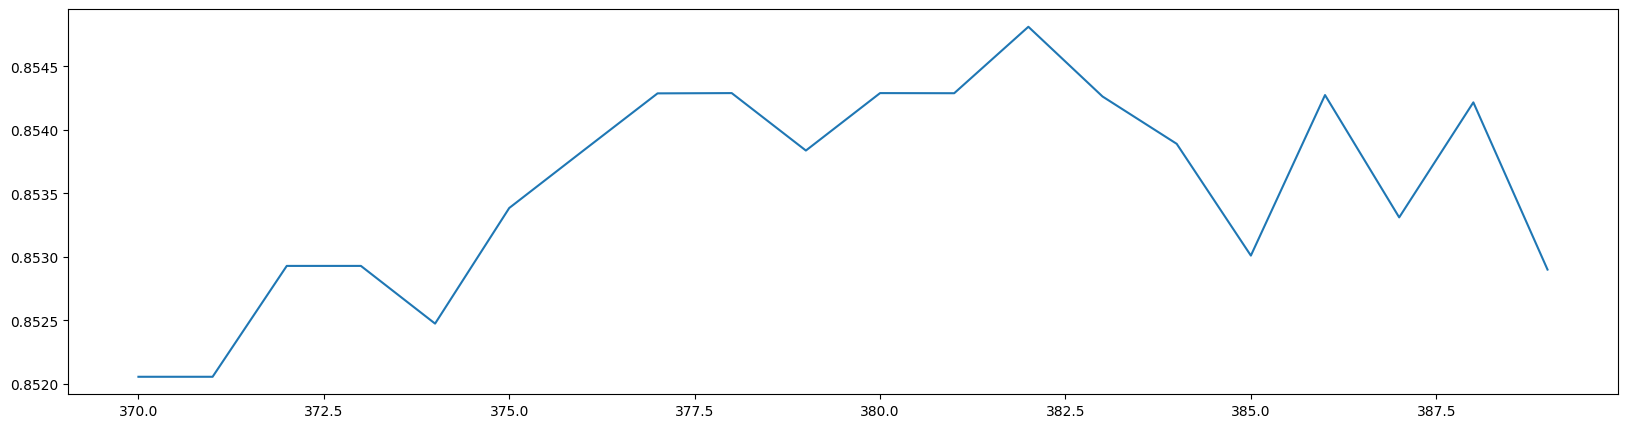

In [38]:
score1 = []
for i in range(370,390):
  model_smote = RandomForestClassifier(n_estimators=i,
                                     n_jobs=-1,
                                     random_state=999)
        # model_smote = model_smote.fit(Xtrain_oversample, Ytrain_oversample)
  score = cross_val_score(model_smote,Xtrain_oversample, Ytrain_oversample,cv=5,scoring='f1_weighted').mean()
  score1.append(score)
print(max(score1),([*range(370,390)][score1.index(max(score1))]))
plt.figure(figsize=[20,5])
plt.plot(range(370,390),score1)
plt.show()